In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



file_path = 'updated_lab03IRCTC.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path,header=0)

# Display the first few rows of the DataFrame
print(df.head())


           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg% Category  
0  0.0020        E  
1  0.0043        D  
2 -0.0020        D  
3 -0.0026        E  
4 -0.0023        A  


In [2]:


# # Iterate over each class label
# for class_label in class_labels:
#     # Select columns belonging to the current class
# Select the columns you want by their names
selected_columns = ['Price', 'Open', 'High', 'Low', 'Chg%']

# Access the DataFrame using the selected columns
class_data = df[selected_columns]
    
    # Calculate the mean of the class using NumPy
for class_label in selected_columns:
    # Select data from the specified column
    class_data = df[class_label]
    
    # Calculate the mean and standard deviation of the column using NumPy
    class_mean = np.mean(class_data)
    class_std = np.std(class_data)
    
    # Display the mean and standard deviation for the current class
    print(f"Class: {class_label}")
    print(f"Mean: {class_mean}")
    print(f"Standard Deviation: {class_std}")



Class: Price
Mean: 1560.6634538152612
Standard Deviation: 241.8604812682637
Class: Open
Mean: 1560.9654618473896
Standard Deviation: 242.0982859752961
Class: High
Mean: 1586.1305220883535
Standard Deviation: 249.35731864450022
Class: Low
Mean: 1538.7427710843374
Standard Deviation: 233.5632990574895
Class: Chg%
Mean: 0.0019642570281124495
Standard Deviation: 0.022442654444254532


In [3]:
mean_vectors = {}

# Iterate over each class label
for class_label in selected_columns:
    # Select data from the specified column
    column_data = df[class_label]
    
    # Calculate the mean vector of the column
    mean_vector = np.mean(column_data)
    
    # Store the mean vector in the dictionary
    mean_vectors[class_label] = mean_vector

# Calculate the pairwise Euclidean distance between mean vectors of different classes
for i, class_label1 in enumerate(selected_columns):
    for j, class_label2 in enumerate(selected_columns):
        if i < j:  # To avoid duplicate pairs
            centroid1 = mean_vectors[class_label1]
            centroid2 = mean_vectors[class_label2]
            distance_ij = np.linalg.norm(centroid1 - centroid2)
            print(f"Distance between {class_label1} and {class_label2}: {distance_ij}")

Distance between Price and Open: 0.3020080321284695
Distance between Price and High: 25.46706827309231
Distance between Price and Low: 21.920682730923772
Distance between Price and Chg%: 1560.6614895582331
Distance between Open and High: 25.16506024096384
Distance between Open and Low: 22.222690763052242
Distance between Open and Chg%: 1560.9634975903616
Distance between High and Low: 47.38775100401608
Distance between High and Chg%: 1586.1285578313255
Distance between Low and Chg%: 1538.7408068273094


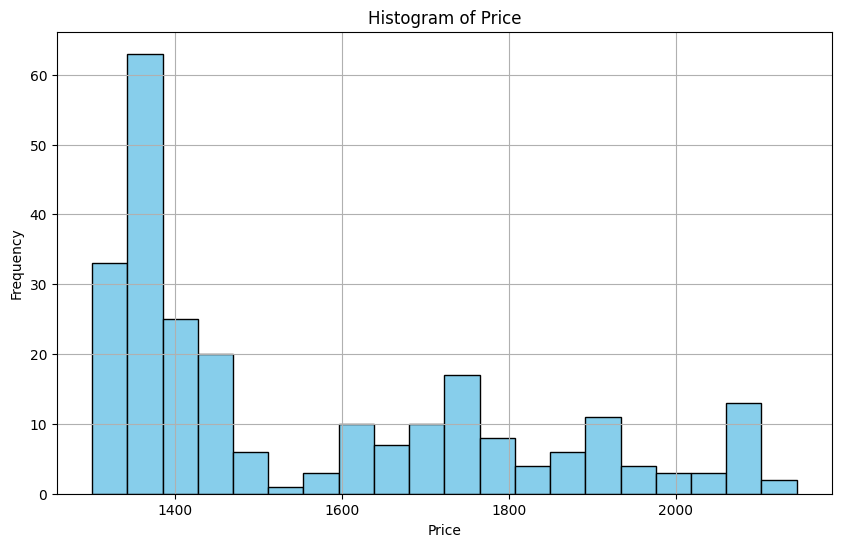

Mean Price: 1560.6634538152612
Variance of Price: 58496.49239931613


In [4]:
price_data = df['Price']

# Plot histogram using matplotlib.pyplot.hist()
plt.figure(figsize=(10, 6))
plt.hist(price_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate mean and variance using numpy.histogram()
hist, bin_edges = np.histogram(price_data, bins=20)
mean_price = np.mean(price_data)
variance_price = np.var(price_data)

print(f"Mean Price: {mean_price}")
print(f"Variance of Price: {variance_price}")

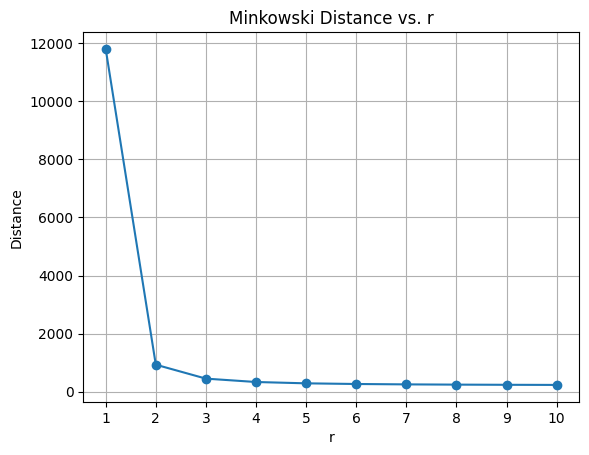

In [5]:
high_column = df['High']
low_column = df['Low']

# Select any two feature vectors
vector1 = high_column.values
vector2 = low_column.values

# Calculate Minkowski distance for r from 1 to 10
r_values = list(range(1, 11))
distances = []

for r in r_values:
    dist = minkowski(vector1, vector2, p=r)
    distances.append(dist)

# Plotting the distances
plt.plot(r_values, distances, marker='o', linestyle='-')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Distance')
plt.xticks(r_values)
plt.grid(True)
plt.show()

In [6]:

# Define your features (X) and target variable (y)
X = df[['Price','Open','High']]  # Features
y = df['Category']  # Target variable

# Split the dataset into train and test sets with a test size of 0.3 (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you can use X_train and y_train for training your model
# And X_test and y_test for evaluating your model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train and y_train are obtained from the previous exercise
# X_train contains the features, and y_train contains the corresponding target labels

# Create a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the kNN classifier on the training set
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)
neigh.predict(X_test)

array(['B', 'D', 'B', 'E', 'B', 'A', 'A', 'A', 'A', 'D', 'A', 'B', 'A',
       'B', 'C', 'A', 'B', 'C', 'B', 'C', 'C', 'A', 'C', 'D', 'A', 'A',
       'B', 'E', 'B', 'A', 'B', 'D', 'B', 'B', 'A', 'C', 'C', 'C', 'B',
       'B', 'C', 'E', 'B', 'A', 'E', 'D', 'B', 'A', 'A', 'E', 'B', 'B',
       'A', 'C', 'C', 'C', 'D', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'C',
       'E', 'A', 'D', 'A', 'A', 'B', 'A', 'B', 'B', 'A'], dtype=object)

In [8]:

# Assuming your dataset is stored in a pandas DataFrame called 'df'

# Randomly select one row from the dataset
test_vector = df.sample(n=1)

# Specify the features you want to include in the test vector
selected_features = ['Price', 'Open', 'High']  # Replace with your actual feature names

# Extract the specified features from the test vector
test_vector_features = test_vector[selected_features]

print("Test Vector:")
print(test_vector_features.values)


Test Vector:
[[1518.9 1474.8 1540. ]]


In [9]:
predicted_class = neigh.predict(test_vector_features)

# Print the predicted class
print("Predicted class for the test vector:", predicted_class)

Predicted class for the test vector: ['B']


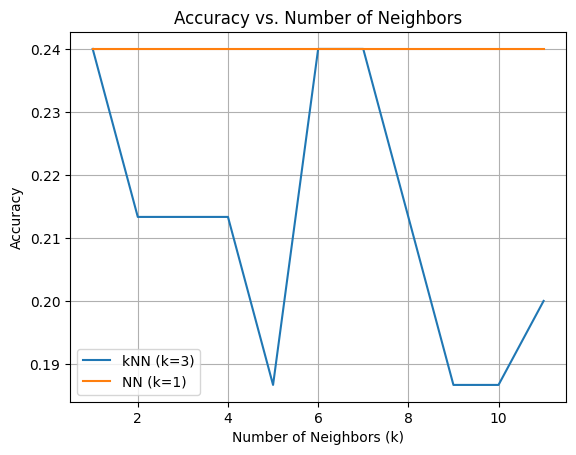

In [10]:
k_values = list(range(1, 12))  # Vary k from 1 to 11
knn_accuracies = []
nn_accuracies = []

# Iterate over different values of k
for k in k_values:
    # Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    knn_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    knn_accuracies.append(knn_accuracy)
    
    # Train NN classifier (k = 1)
    nn = KNeighborsClassifier(n_neighbors=1)
    nn.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    nn_pred = nn.predict(X_test)
    nn_accuracy = accuracy_score(y_test, nn_pred)
    nn_accuracies.append(nn_accuracy)

# Plot the accuracy results
plt.plot(k_values, knn_accuracies, label='kNN (k=3)')
plt.plot(k_values, nn_accuracies, label='NN (k=1)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Define a function to calculate and print performance metrics
def evaluate_model(y_true, y_pred, dataset):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Extract TP, FN, FP, TN from confusion matrix
    tp = cm[1, 1]
    fn = cm[1, 0]
    fp = cm[0, 1]
    tn = cm[0, 0]
    
    # Print confusion matrix with labels
    print(f"Confusion Matrix ({dataset} data):")
    print(f"{'Actual/Predicted':<20}{'Positive':<10}{'Negative':<10}")
    print(f"{'Positive':<20}{tp:<10}{fn:<10}")
    print(f"{'Negative':<20}{fp:<10}{tn:<10}")
    
    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    print(f"Precision ({dataset} data): {precision:.2f}")
    print(f"Recall ({dataset} data): {recall:.2f}")
    print(f"F1-Score ({dataset} data): {f1:.2f}")
    print()

# Assuming you already have trained and tested your model
# Evaluate kNN (k = 3) on training and test data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
evaluate_model(y_train, knn_train_pred, "Training")

knn_test_pred = knn.predict(X_test)
evaluate_model(y_test, knn_test_pred, "Test")


Confusion Matrix (Training data):
Actual/Predicted    Positive  Negative  
Positive            22        13        
Negative            0         31        
Precision (Training data): 0.61
Recall (Training data): 0.51
F1-Score (Training data): 0.49

Confusion Matrix (Test data):
Actual/Predicted    Positive  Negative  
Positive            5         5         
Negative            4         3         
Precision (Test data): 0.27
Recall (Test data): 0.23
F1-Score (Test data): 0.21

